# Module 2: Data Engineering
## Sprint 2: SQL and Data Scraping
## Storing Scraped Information

## Background 
You did an outstanding job this sprint. Now you know SQL databases, how to make basic data operations. You are familiar with the pros and cons of SQL and should know when to choose a NoSQL database. Data scraping is a technique that you can use to create your own dataset. You are also familiar with the basic concepts of Spark. You should be proud of yourself! For the last lesson of this week, you should put all your learnings into one place to collect, process, and store data. Combining these two might require a bit of planning at first but this is what you will need to do now.

---

## Creating the PostgreSQL database
First, you will need to create a database that you will need to use to store the data you will collect. Follow the steps provided in the second lesson of this sprint. Do not forget to remove all secrets and passwords when committing code to the repository. 

## Scraping the data
This lesson, you will need to scrape and store data collected from an online store. You can choose any website that you like (Vinted, Amazon, eBay, etc.). You will need to select three keywords (for example `dress`, `bike`, `bracelet`) and scrape listings from the selected website. You will need to collect at least 3000 samples for each category and store this information of the listing: `category`, `title`, `price`, `url to item`, `url of image`. 

## Structure of the database
As you will be storing data into the relational database, you will need to create tables. There should be two tables with many to one type of relationship.

---

## Concepts to explore
* Creating relational type database
* Creating PostgreSQL database in Heroku
* Writing SQL queries
* Scraping webpages using Beautiful Soup
* Storing and acquiring data using SQL

## Requirements
You should create two files: one that contains functions related to data scraping and another that is created to enable communication to PostgreSQL database created with Heroku. The actual requirements are these:
- Database should be created using Heroku.
- Required tables should be created. Python code should be provided inside `.py` file.
- Scraping functions should be created. The main scraping function should take two arguments: `number of examples to scrape` and `keyword to search`. The main scraping function should return a Pandas `DataFrame` with the records.
- Scrape the website. Get minimum 3000 samples of each category (keyword)
- Data should be inserted into tables of database hosted by Heroku. Provide screenshots proofing that data sits inside the database.
- Join two tables into one using SQL query and export it to `csv` file. Provide a function that makes this action.


## Evaluation criteria
1. The requirements are met (database and tables in it are created, data is scraped and stored)
2. Data scraping functions are written.
3. Code meets expected standards (type hints, PEP8 standards)
4. Documentation is provided (comments are written where needed, README.md file is created)


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- Why do we store information inside external databases? Tell two advantages and disadvantages when comparing local and external storage.
- What is the difference between SQL and NoSQL databases? Tell two examples: one where you would want to use PostgreSQL database and another where you would choose Cassandra.
- How to properly set up a data scraping strategy? What are the key steps that you must make to successfully create a dataset using web scraping technique?
- Why do we need Spark? Tell about one use case where Spark would improve scalability and speed of queries when comparing to traditional relational type database's engine.

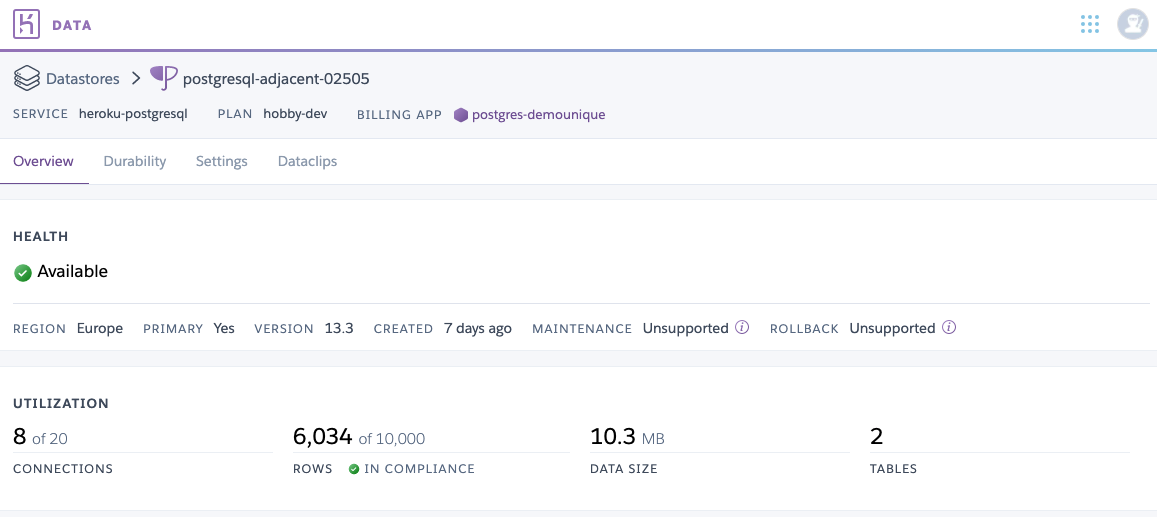

In [15]:
from IPython.display import Image
Image(filename='Screenshot.png')

In [1]:
from scraper import *
import csv
import psycopg2

In [18]:
url = "https://www.jumia.com.ng/smartphones/"
last_page = getLastPageNumber(url)
data = getData(last_page, url,"phones")
data.to_csv("dump.csv", mode="a", header=False, index=False)

In [15]:
connection = psycopg2.connect(
    database="d5ovtlv8flhoaa",
    user= "mxclvlxdjherxs",
    password = "67bd91c58484a67740031977954aa4e3b1aa3ace931f0b6bd76a7652178c0190",
    host="ec2-108-128-104-50.eu-west-1.compute.amazonaws.com",
    port="5432"
)
connection

<connection object at 0x132ab2970; dsn: 'user=mxclvlxdjherxs password=xxx dbname=d5ovtlv8flhoaa host=ec2-108-128-104-50.eu-west-1.compute.amazonaws.com port=5432', closed: 0>

In [ ]:
try:
  cur = connection.cursor()
  print("connection made")
except:
  print("Bad connection")
  connection.close()

cur.execute("""DROP TABLE IF EXISTS data;""")
cur.execute("""DROP TABLE IF EXISTS categories;""")
cur.execute("""
CREATE TABLE data(
  id SERIAL PRIMARY KEY,\
  post_title VARCHAR(3000),\
  post_url VARCHAR(3000),\
  post_price INT,\
  post_thumb_url VARCHAR(3000),\
  category VARCHAR(30));""")

cur.execute("""
CREATE TABLE categories(
  categoryId INT PRIMARY KEY,
  category VARCHAR(50));""")

try:
 connection.commit()
 print("Data committed")
except:
  print("could not commit")

connection made
Data committed


In [ ]:
try:
  cur = connection.cursor()
  print("connection made")
except:
  print("Bad connection")
  connection.close()

cur.execute('''INSERT INTO categories VALUES
    (1, 'dresses'),
    (2, 'laptops'),
    (3, 'phones');''')

try:
 connection.commit()
 print("Data committed")
except psycopg2.ProgrammingError:
  print("could not commit")


connection made
Data committed


In [ ]:
# For one to many connection
try:
  cur = connection.cursor()
  print("connection made")
except:
  print("Bad connection")
  connection.close()

cur.execute('''SELECT * FROM categories;''')
all_cat = cur.fetchall()
print(all_cat)

try:
  connection.commit()
  print("Data committed")
except psycopg2.ProgrammingError:
  print("could not commit")


connection made
[(1, 'dresses'), (2, 'laptops'), (3, 'phones')]
Data committed


In [ ]:
def load_csv_to_db(filename, tablename):
    """To load the csv to the PostgreSQL database"""
    try:
        cur = connection.cursor()
        with open(f"{filename}", "r") as file:
            next(file)
            cur.copy_from(file, f"{tablename}", sep=",")
        connection.commit()
        print("Data committed")  
    except:
        print("Data not commintted") 
        
load_csv_to_db("export.csv", "data")

Data committed


In [16]:
# Execute a table join
try:
  cur = connection.cursor()
  print("connection made")
except:
  print("Bad connection")
  connection.close()

cur.execute('''SELECT categories.categoryId, \
            categories.category, \
            MAX(data.post_price)\
            FROM categories \
            JOIN data\
            ON categories.category = data.category\
            GROUP BY categories.categoryId;''')

price_compare = cur.fetchall()
print(price_compare)

try:
  csvFile = csv.writer(open("join.csv", 'w', newline=''),\
          delimiter=',', lineterminator='\r\n',\
                             quoting=csv.QUOTE_ALL, escapechar='\\')
  csvFile.writerows(price_compare)
except psycopg2.DatabaseError as e:
  print("could not execute")
  quit()
finally:
  connection.close()

connection made
[(1, 'dresses', 40000), (3, 'phones', 952999), (2, 'laptops', 1400000)]
